In [ ]:
# https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41

In [1]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
# Read the city populations dataset with pandas. 
# We only need 4 columns to work with 'name', 'group', 'year', 'value'. 
# Typically, a name is mapped to a group (city to continent/country) and each year has one value.

df = pd.read_csv('https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations', 
                 usecols=['name', 'group', 'year', 'value'])
df.head(3)

,name,group,year,value
0,Agra,India,1575,200.0
1,Agra,India,1576,212.0
2,Agra,India,1577,224.0


In [3]:
# Data transformations
# We are interested to see top 10 values are a given year. 
# Using pandas transformations, we will get top 10 values.

current_year = 2019
dff = (df[df['year'].eq(current_year)]
       .sort_values(by='value', ascending=True)
       .head(10))
dff

,name,group,year,value
2538,Karachi,Asia,2019,18707.6
4328,New York,North America,2019,18753.0
1196,Cairo,Middle East,2019,20208.8
1337,Dhaka,Asia,2019,20310.8
4680,Osaka,Asia,2019,20466.0
3575,Mexico City,Latin America,2019,21694.2
5446,Sao Paulo,Latin America,2019,21908.4
3749,Mumbai,India,2019,22479.0
690,Beijing,Asia,2019,23437.6
5548,Shanghai,Asia,2019,26457.8


<BarContainer object of 10 artists>

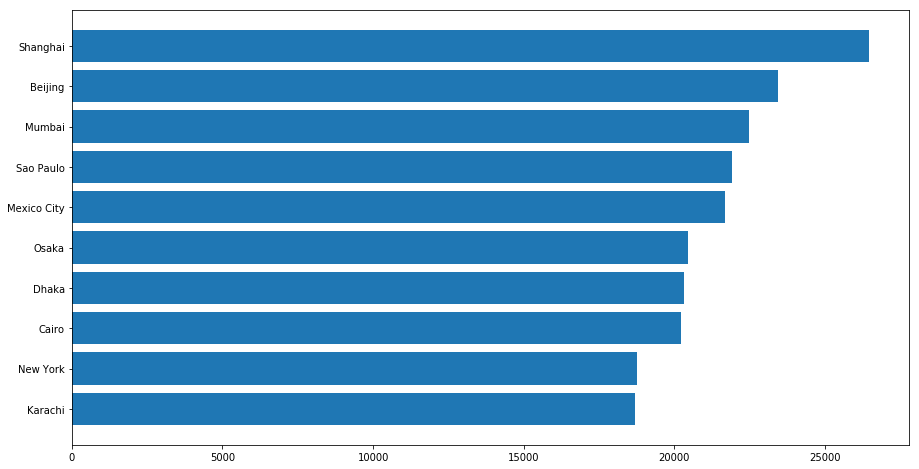

In [4]:
# Basic chart
# Now, let’s plot a basic bar chart. 
# We start by creating a figure and an axes. Then, we use ax.barh(x, y) to draw horizontal barchart.

fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

In [6]:
## Color, Labels
# Next, let’s add values, group labels and colors based on groups. 
# We’ll user colors and group_lk to add color to the bars.

colors = dict(zip(
    ['India', 'Europe', 'Asia', 'Latin America',
     'Middle East', 'North America', 'Africa'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))

# group_lk is mapping between name and group values.
group_lk = df.set_index('name')['group'].to_dict()

Text(1,0.4,'2019')

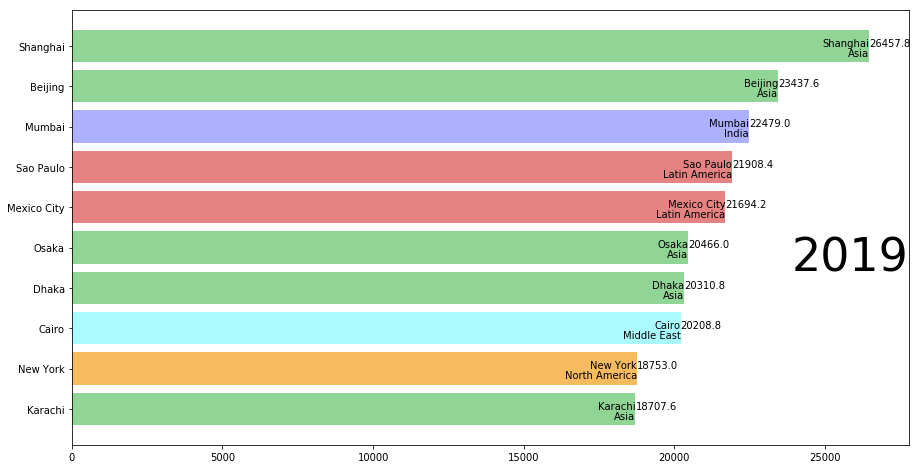

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

In [ ]:
# Polish Style

# For convenience let’s move our code to draw_barchart function.
# We need to style following items:

# Text: Update font sizes, color, orientation
# Axis: Move X-axis to top, add color & subtitle
# Grid: Add lines behind bars
# Format: comma separated values and axes tickers
# Add title, credits, gutter space
# Remove: box frame, y-axis labels
# We’ll add another dozen lines of code for this.

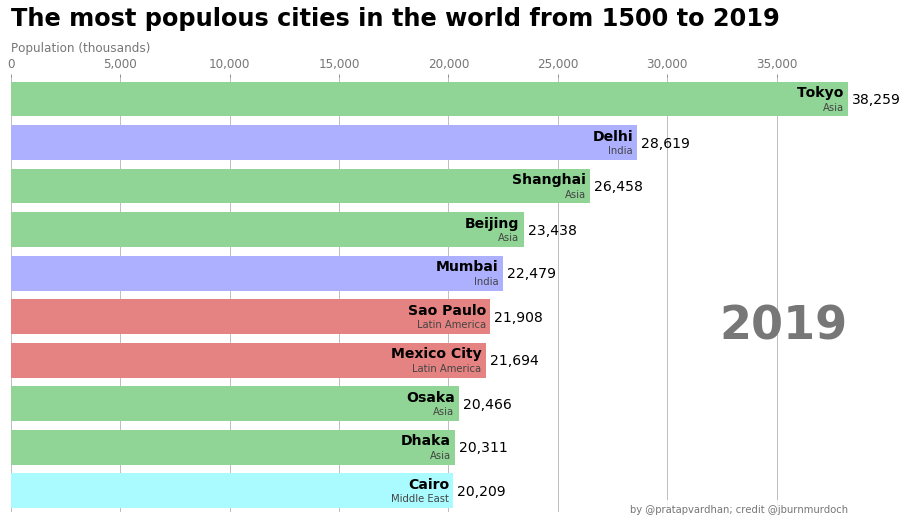

In [11]:
ig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous cities in the world from 1500 to 2019',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2019)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


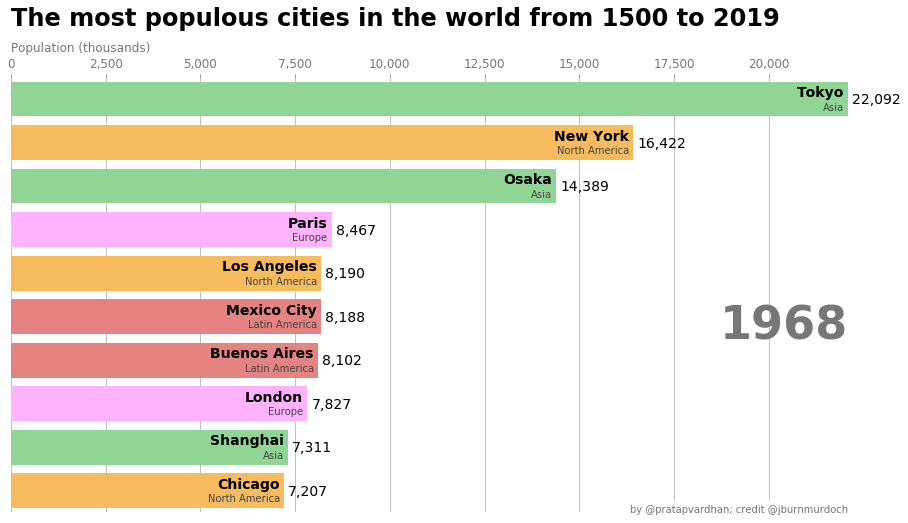

In [12]:
# Animate Race

# To animate the race, we will use FuncAnimation from matplotlib.animation. 
# FuncAnimatio creates an animation by repeatedly calling a function (that draws on canvas). 
# In our case, that function will be draw_barchart. We also use frames, 
# this argument accepts on what values you want to run draw_barchart – we’ll run from year 1968 to 2019

import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1968, 2020))
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()